# Page View Time Series Visualizer

#### For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. 

#### The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')

In [4]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975)) ]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


Text(0.5, 1.0, 'Daily freecodecamp Forum page views 5/2016-12/2019')

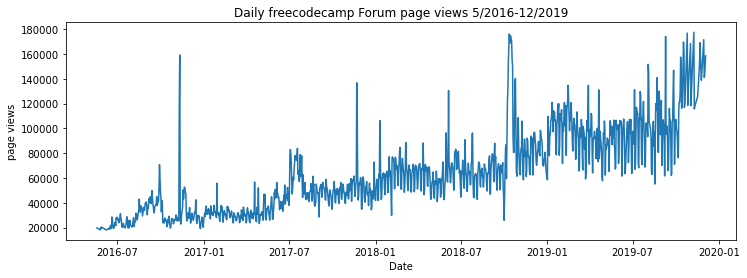

In [6]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.lineplot(data=df, x='date', y='value')
plt.xlabel('Date')
plt.ylabel('page views')
plt.title('Daily freecodecamp Forum page views 5/2016-12/2019')
  

In [27]:
#Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()
df_bar.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']



In [28]:
df_bar

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


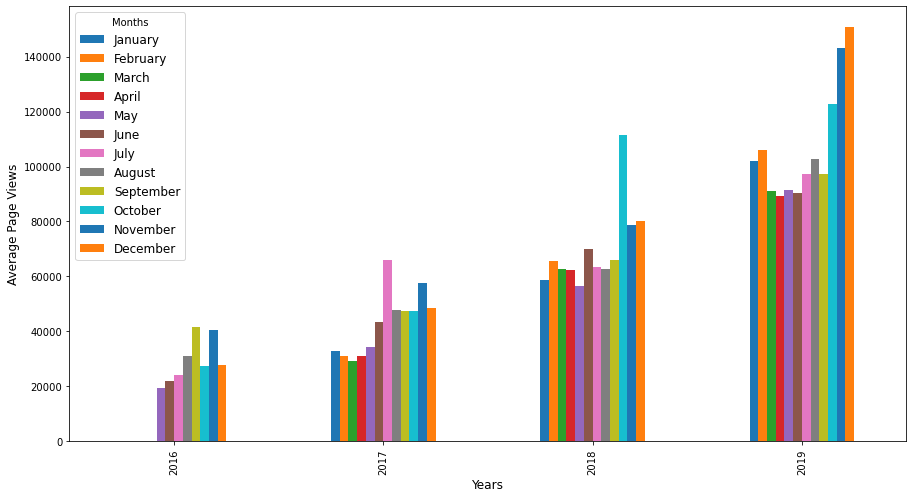

In [29]:
fig = df_bar.plot(kind='bar', figsize = (15,8)).figure
plt.title('')
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Average Page Views', fontsize = 12)
plt.legend(loc = 'upper left', title = 'Months', fontsize = 12)

In [34]:
#Prepare data for box plots 
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0, 0.5, 'Page Views')

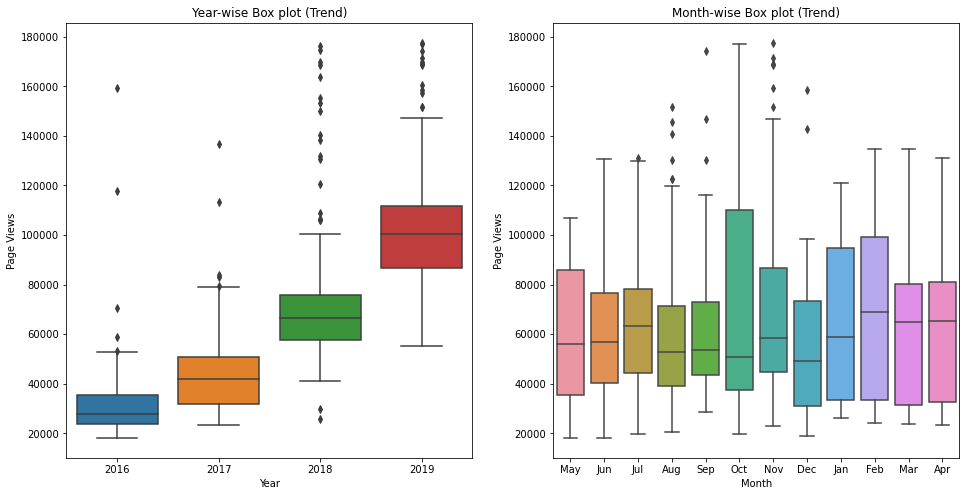

In [35]:
#Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
sns.boxplot(ax=ax1, x="year", y="value", data=df_box)
ax1.set_title("Year-wise Box plot (Trend)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")
sns.boxplot(ax=ax2, x="month", y="value", data=df_box)
ax2.set_title("Month-wise Box plot (Trend)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")
